#### Model Objective: 
*See what is the total browns and greens - to see how much compost they are making and how long it will take to break down, and hence, be able to return the waiting duration (aka optimal extraction timing)*

Task:
1) Predict NPK levels based on feeding category

------------------------------------------------------------------------

#### Done so far: 
- Prediction of NPK level

1) Analyse Each Tank Seperately (E.g. Diff trends, behavious -> Can record back to feeding log)
2) Prediction Model: ARMA
3) Plot Line Graph with different ranges for different category
4) Each tank graph should have 3 lines to show NPK trend
5) Predict future data for each tank

Article Used: https://builtin.com/data-science/time-series-forecasting-python

------------------------------------------------------------------------

#### What has to be done:

1) Prediction of NPK levels based on feeding category (browns, greens, mixed)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

In [4]:
# load data
df = pd.read_csv('2024 Extracted.csv')

In [5]:
df.head()

,dbtimestamp,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH,NPK Ratio,N Category,P Category,K Category,NPK Level,NPK Done,feeding_description,Feeding Category
0,2025-05-30 00:01:55.980744,NDS016,213.0,18.9,6.0,59.0,52.0,25.6,5.5,1.0 : 9.8 : 8.7,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
1,2025-05-29 00:01:26.817793,NDS016,240.0,18.9,11.0,72.0,65.0,27.8,5.5,1.0 : 6.5 : 5.9,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
2,2025-05-28 00:00:48.939404,NDS016,247.0,18.1,13.0,76.0,68.0,26.5,5.5,1.0 : 5.8 : 5.2,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
3,2025-05-27 00:00:19.025437,NDS016,270.0,19.2,17.0,87.0,80.0,27.3,5.5,1.0 : 5.1 : 4.7,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
4,2025-05-26 00:01:19.007408,NDS016,292.0,20.7,22.0,98.0,90.0,26.9,5.2,1.0 : 4.5 : 4.1,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN


Change dbtimestamp to datetime

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dbtimestamp          722 non-null    object 
 1   devicename           722 non-null    object 
 2   Soil EC              722 non-null    float64
 3   Soil Moisture        722 non-null    float64
 4   Soil Nitrogen        722 non-null    float64
 5   Soil Phosphorus      722 non-null    float64
 6   Soil Potassium       722 non-null    float64
 7   Soil Temperature     722 non-null    float64
 8   Soil pH              722 non-null    float64
 9   NPK Ratio            722 non-null    object 
 10  N Category           722 non-null    object 
 11  P Category           722 non-null    object 
 12  K Category           722 non-null    object 
 13  NPK Level            722 non-null    object 
 14  NPK Done             722 non-null    object 
 15  feeding_description  102 non-null    obj

In [7]:
df['dbtimestamp'] = df['dbtimestamp'].astype('datetime64[ns]')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dbtimestamp          722 non-null    datetime64[ns]
 1   devicename           722 non-null    object        
 2   Soil EC              722 non-null    float64       
 3   Soil Moisture        722 non-null    float64       
 4   Soil Nitrogen        722 non-null    float64       
 5   Soil Phosphorus      722 non-null    float64       
 6   Soil Potassium       722 non-null    float64       
 7   Soil Temperature     722 non-null    float64       
 8   Soil pH              722 non-null    float64       
 9   NPK Ratio            722 non-null    object        
 10  N Category           722 non-null    object        
 11  P Category           722 non-null    object        
 12  K Category           722 non-null    object        
 13  NPK Level            722 non-null  

Filter columns that are needed

In [8]:
npk = pd.concat([df.iloc[:, :9], df.iloc[:, [16]]], axis=1)

npk.head()

,dbtimestamp,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH,Feeding Category
0,2025-05-30 00:01:55.980744,NDS016,213.0,18.9,6.0,59.0,52.0,25.6,5.5,NaN
1,2025-05-29 00:01:26.817793,NDS016,240.0,18.9,11.0,72.0,65.0,27.8,5.5,NaN
2,2025-05-28 00:00:48.939404,NDS016,247.0,18.1,13.0,76.0,68.0,26.5,5.5,NaN
3,2025-05-27 00:00:19.025437,NDS016,270.0,19.2,17.0,87.0,80.0,27.3,5.5,NaN
4,2025-05-26 00:01:19.007408,NDS016,292.0,20.7,22.0,98.0,90.0,26.9,5.2,NaN


In [9]:
npk = npk.sort_values(['devicename', 'dbtimestamp'])
npk.head()

,dbtimestamp,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH,Feeding Category
354,2025-01-15 03:02:26.401342,NDS002,1231.0,84.4,218.0,550.0,547.0,25.5,6.0,NaN
717,2024-11-05 11:16:19.373751,NDS004,436.0,45.1,52.0,167.0,160.0,28.5,7.1,Green
709,2024-11-06 00:00:28.462437,NDS004,439.0,45.9,53.0,168.0,162.0,27.6,6.9,NaN
701,2024-11-07 00:00:26.447322,NDS004,432.0,47.0,51.0,165.0,158.0,27.5,7.1,NaN
698,2024-11-08 00:00:12.840733,NDS004,434.0,44.0,52.0,166.0,159.0,27.6,7.2,NaN


Separate into different tanks

In [10]:
# Will not be using NDS002 for now

npk.groupby('devicename').size()

devicename
NDS002      1
NDS004     98
NDS005     98
NDS006     78
NDS011     98
NDS012     98
NDS015     78
NDS016    173
dtype: int64

In [11]:
npk.groupby('Feeding Category').size()

Feeding Category
Brown      35
Green      21
Mixed      25
Unknown    21
dtype: int64

In [12]:
npk['devicename'].unique()

array(['NDS002', 'NDS004', 'NDS005', 'NDS006', 'NDS011', 'NDS012',
       'NDS015', 'NDS016'], dtype=object)

In [13]:
# Drop NDS002

tank_groups = {name: group for name, group in npk.groupby('devicename')}
del tank_groups['NDS002']

In [14]:
tank_groups['NDS004'].head()  # or any valid devicename string

,dbtimestamp,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH,Feeding Category
717,2024-11-05 11:16:19.373751,NDS004,436.0,45.1,52.0,167.0,160.0,28.5,7.1,Green
709,2024-11-06 00:00:28.462437,NDS004,439.0,45.9,53.0,168.0,162.0,27.6,6.9,NaN
701,2024-11-07 00:00:26.447322,NDS004,432.0,47.0,51.0,165.0,158.0,27.5,7.1,NaN
698,2024-11-08 00:00:12.840733,NDS004,434.0,44.0,52.0,166.0,159.0,27.6,7.2,NaN
688,2024-11-09 00:00:29.859523,NDS004,442.0,43.0,53.0,170.0,163.0,27.5,7.3,Mixed


Use datetime as Index

In [15]:
for name in tank_groups:
    tank_groups[name] = tank_groups[name].copy()  
    tank_groups[name]['dbtimestamp'] = pd.to_datetime(tank_groups[name]['dbtimestamp'])
    tank_groups[name].set_index('dbtimestamp', inplace=True)


In [16]:
# Example of extracting tank

tank_groups['NDS004'].head()

,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH,Feeding Category
dbtimestamp,,,,,,,,,
2024-11-05 11:16:19.373751,NDS004,436.0,45.1,52.0,167.0,160.0,28.5,7.1,Green
2024-11-06 00:00:28.462437,NDS004,439.0,45.9,53.0,168.0,162.0,27.6,6.9,NaN
2024-11-07 00:00:26.447322,NDS004,432.0,47.0,51.0,165.0,158.0,27.5,7.1,NaN
2024-11-08 00:00:12.840733,NDS004,434.0,44.0,52.0,166.0,159.0,27.6,7.2,NaN
2024-11-09 00:00:29.859523,NDS004,442.0,43.0,53.0,170.0,163.0,27.5,7.3,Mixed


In [17]:
for name in tank_groups:
    if 'dbtimestamp' in tank_groups[name].columns:  # check if it exists
        del tank_groups[name]['dbtimestamp']

Plot NPK Levels 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

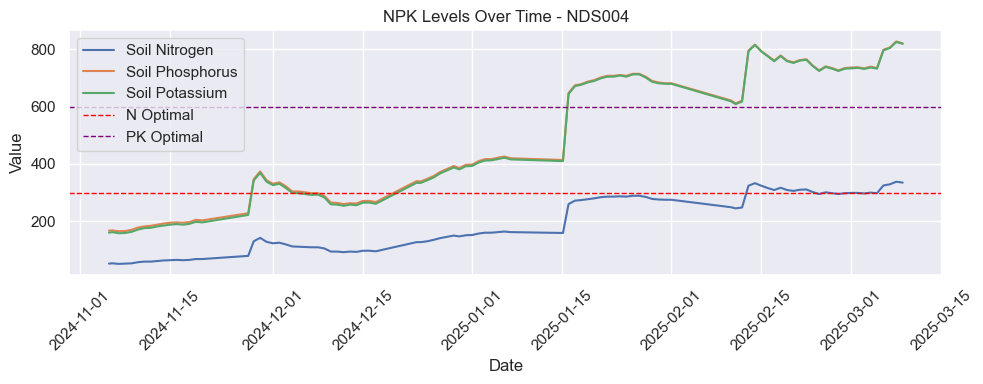

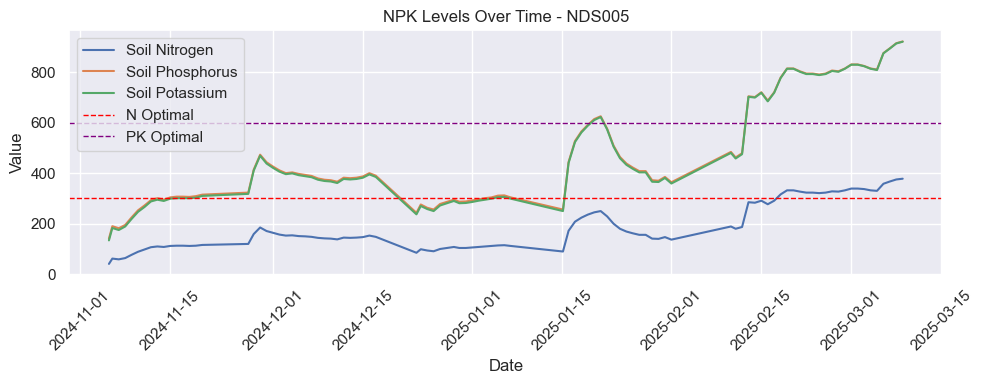

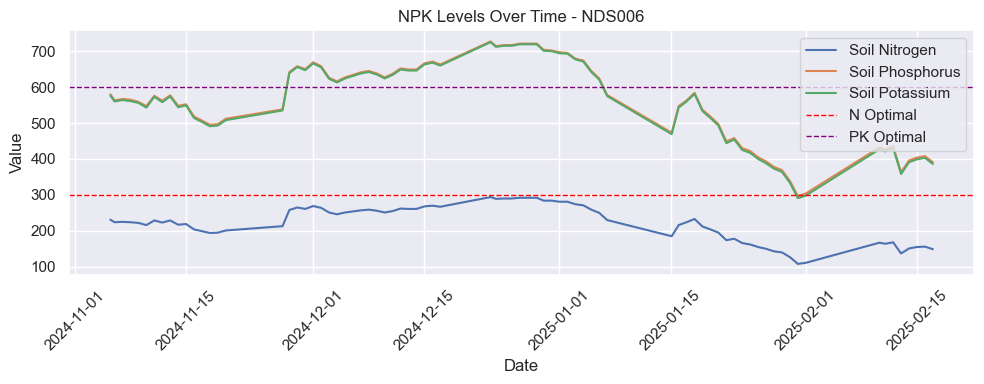

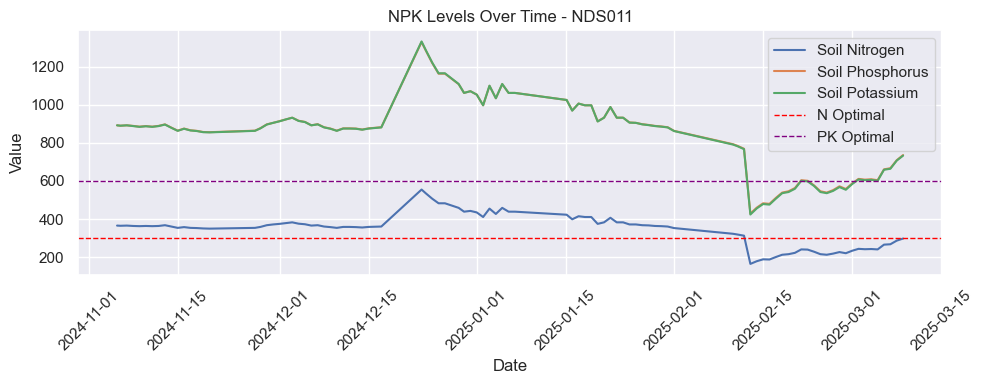

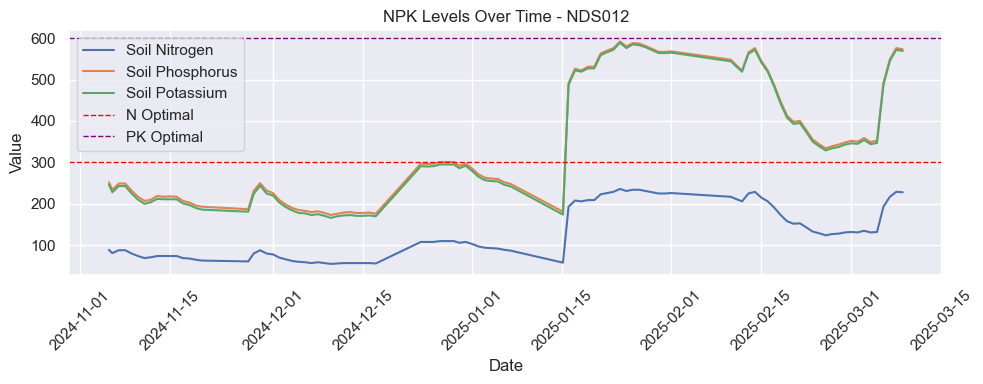

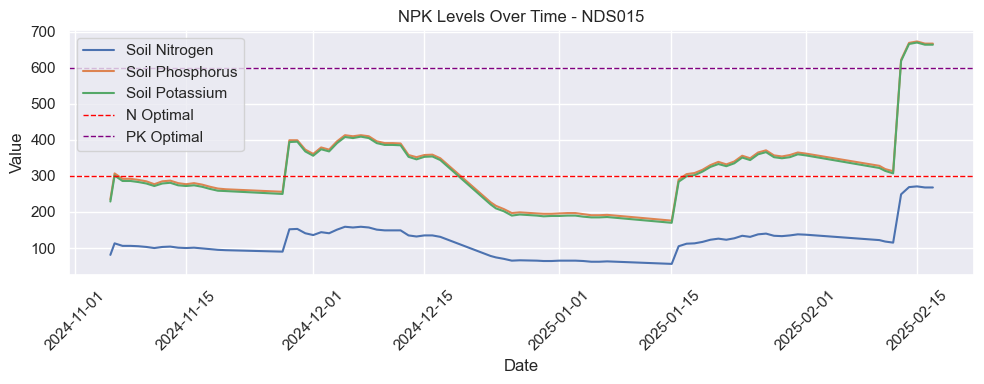

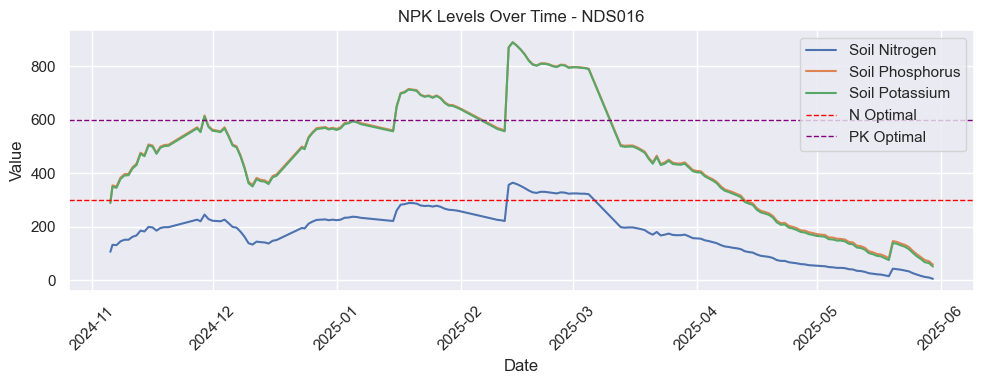

In [19]:
import matplotlib.pyplot as plt

for name in tank_groups:
    plt.figure(figsize=(10, 4))  # Separate plot for each tank
    plt.title(f'NPK Levels Over Time - {name}')
    plt.ylabel('Value')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    
    # Plot each nutrient
    for nutrient in ['Soil Nitrogen', 'Soil Phosphorus', 'Soil Potassium']:
        plt.plot(tank_groups[name].index, tank_groups[name][nutrient], label=nutrient)
    
    # Add horizontal lines
    plt.axhline(y=300, color='red', linestyle='--', linewidth=1, label='N Optimal')
    plt.axhline(y=600, color='purple', linestyle='--', linewidth=1, label='PK Optimal')
    
    plt.legend()
    plt.tight_layout()
    plt.show()


Split data for train test

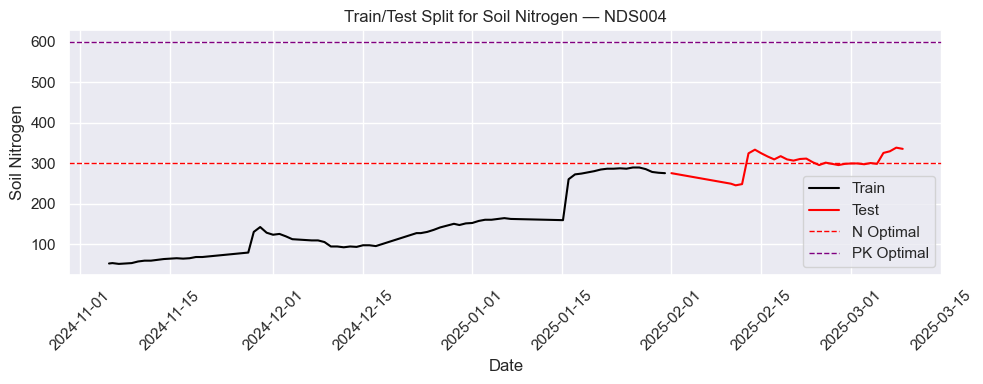

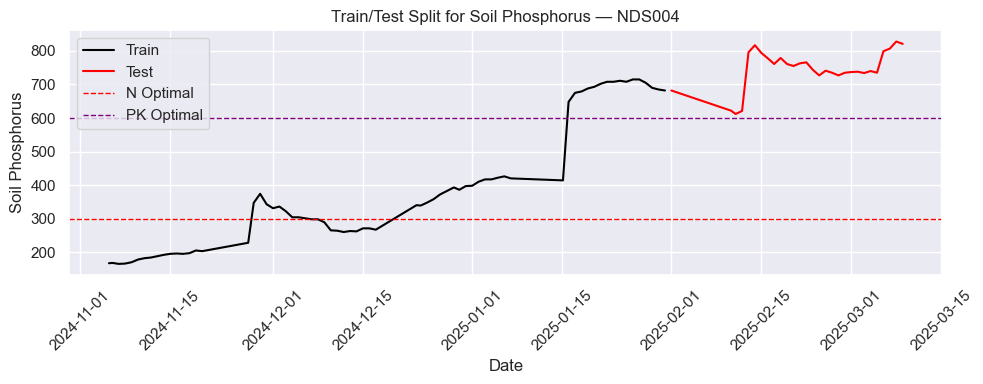

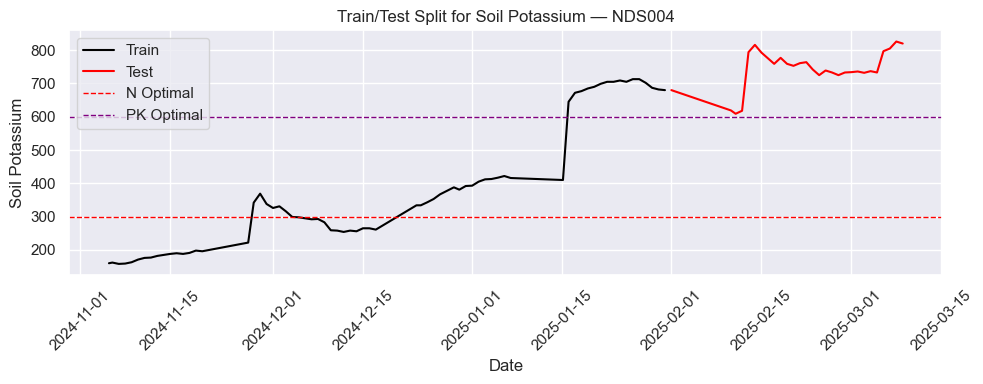

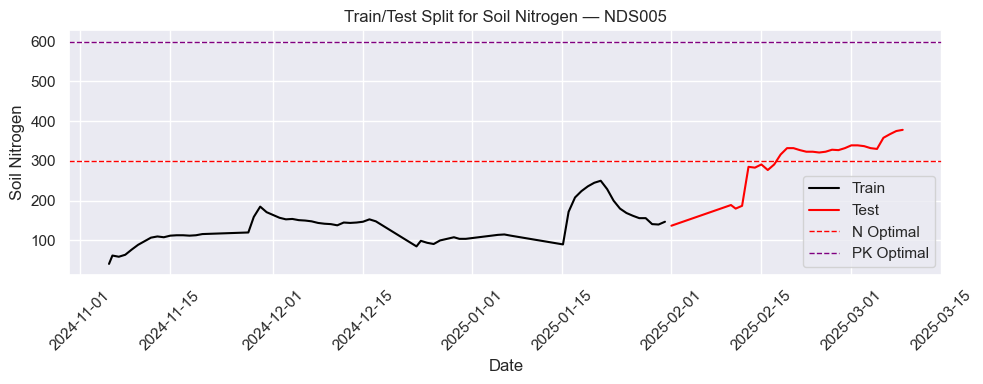

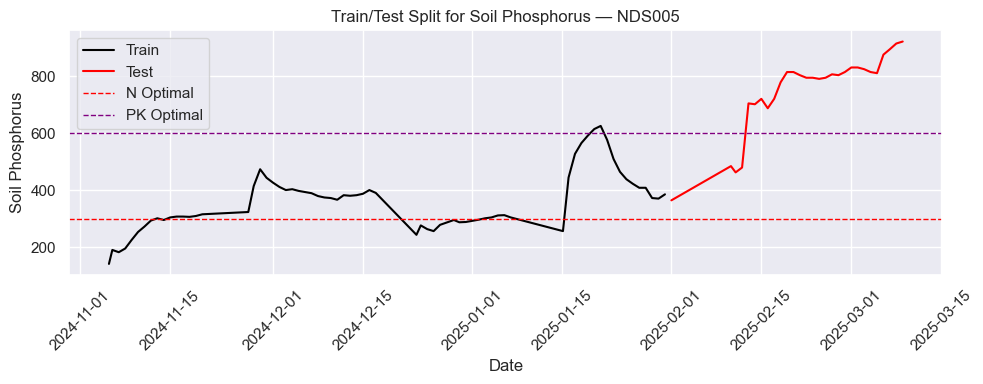

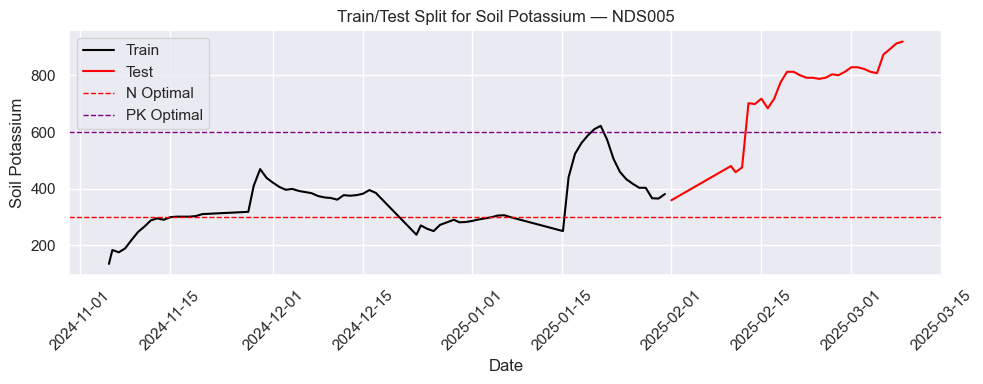

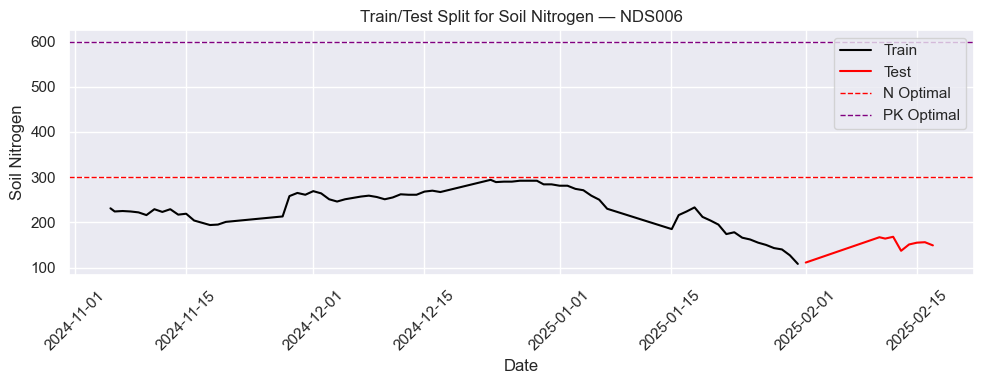

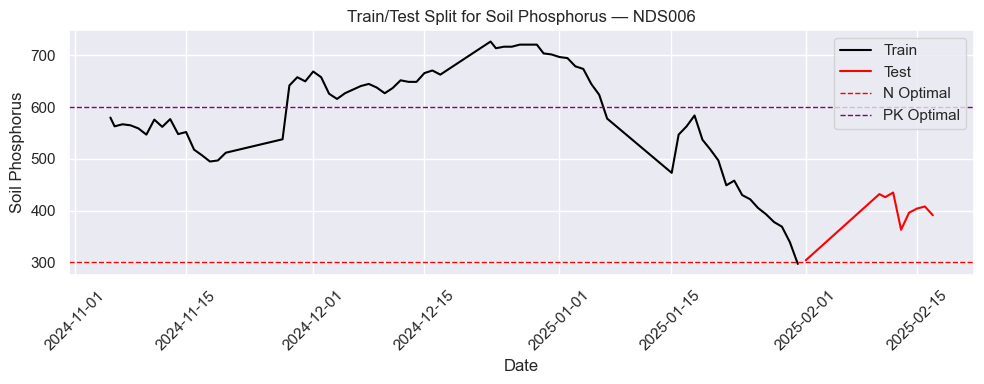

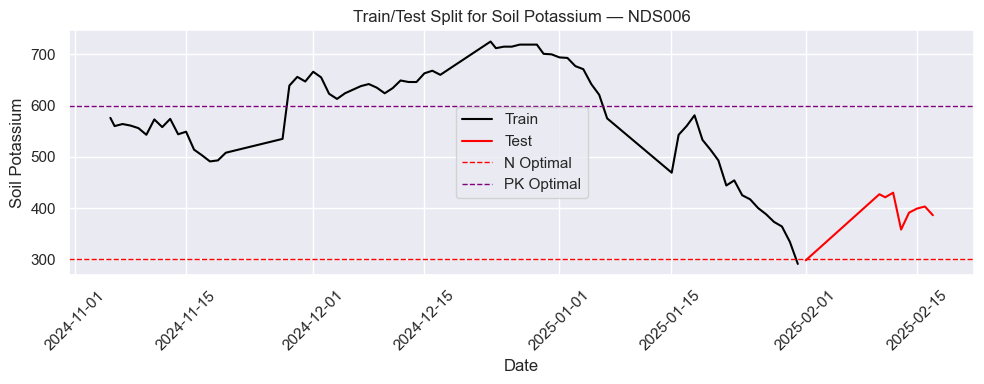

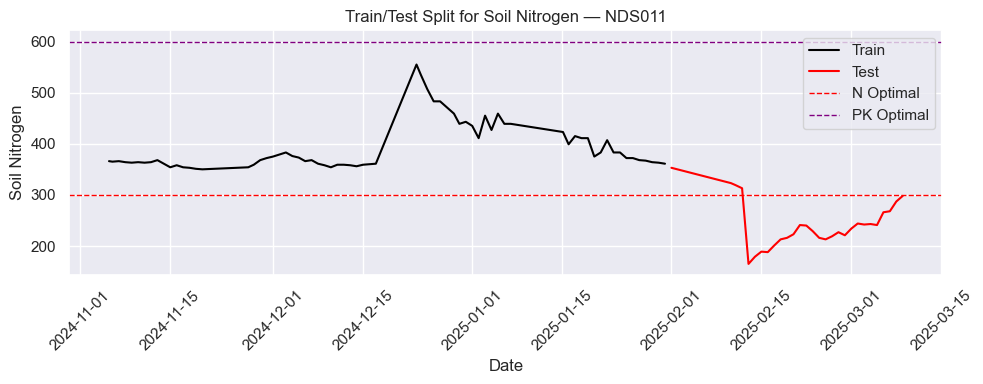

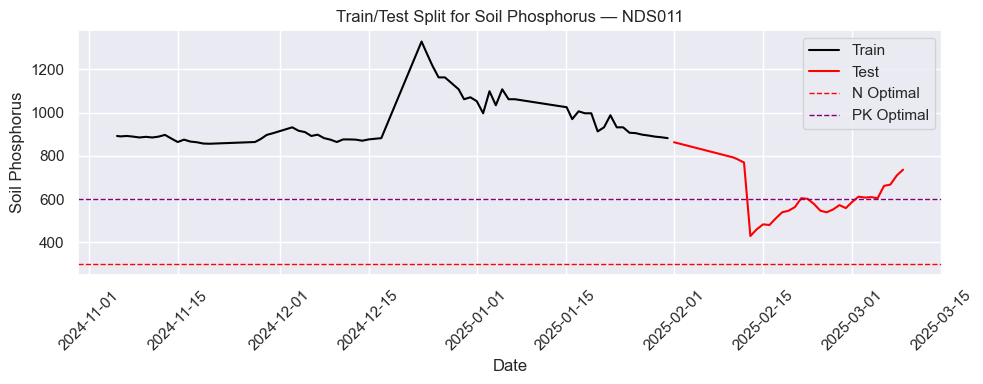

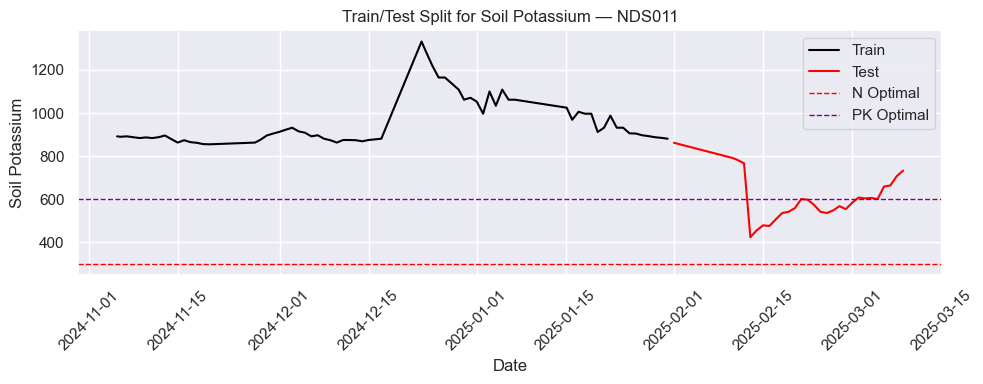

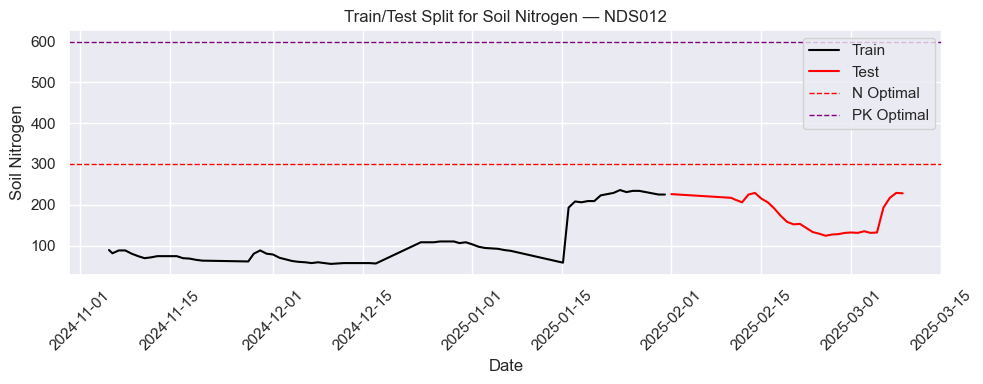

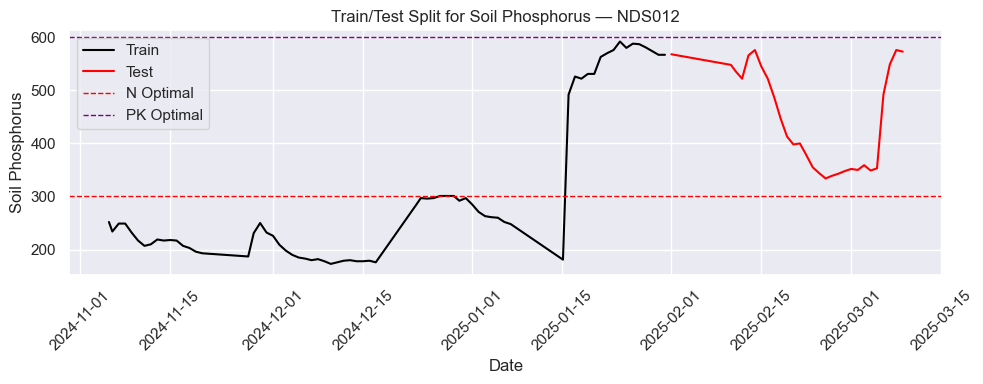

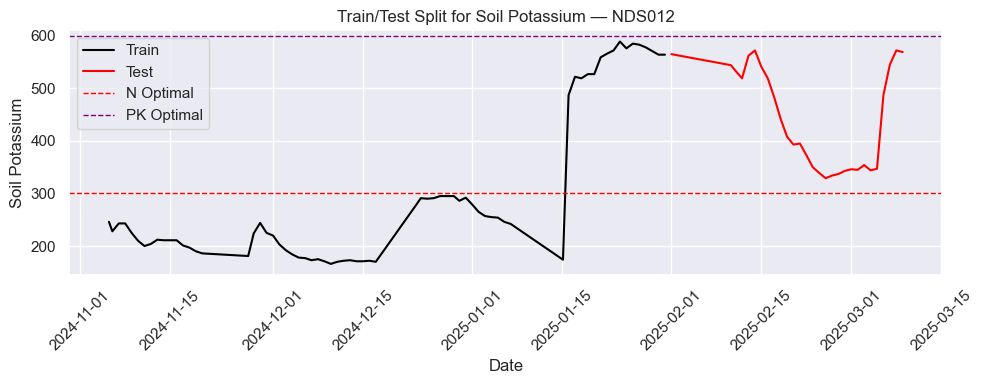

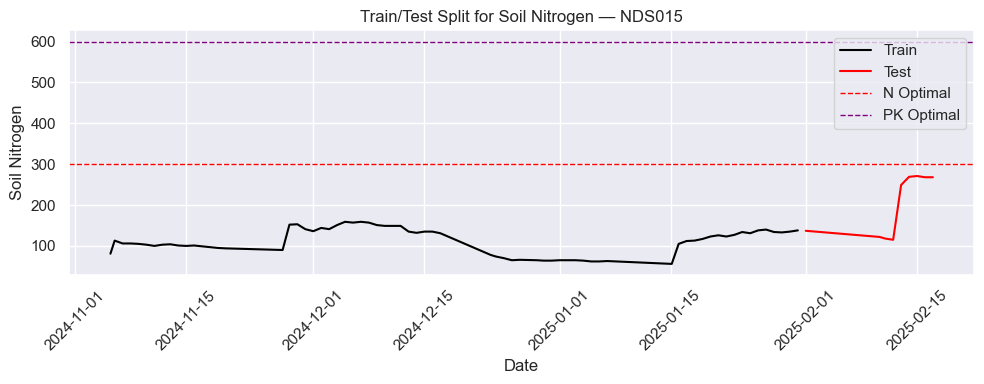

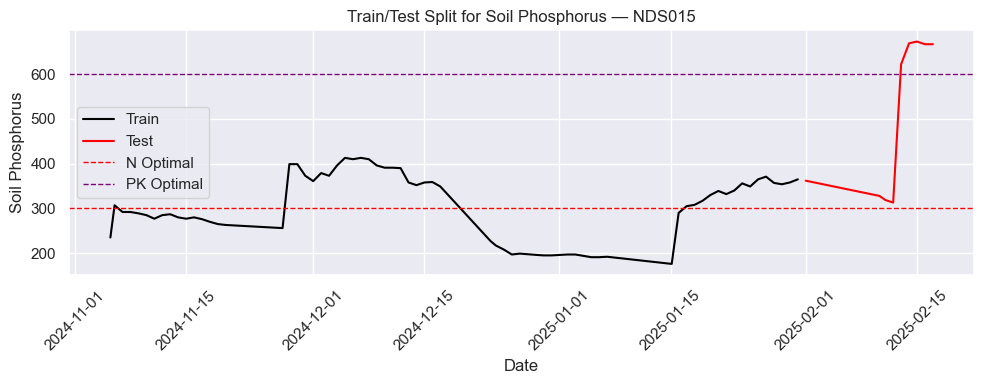

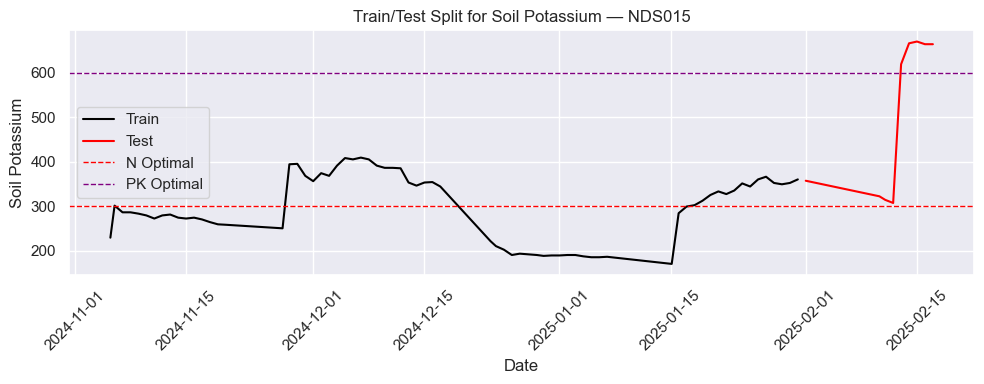

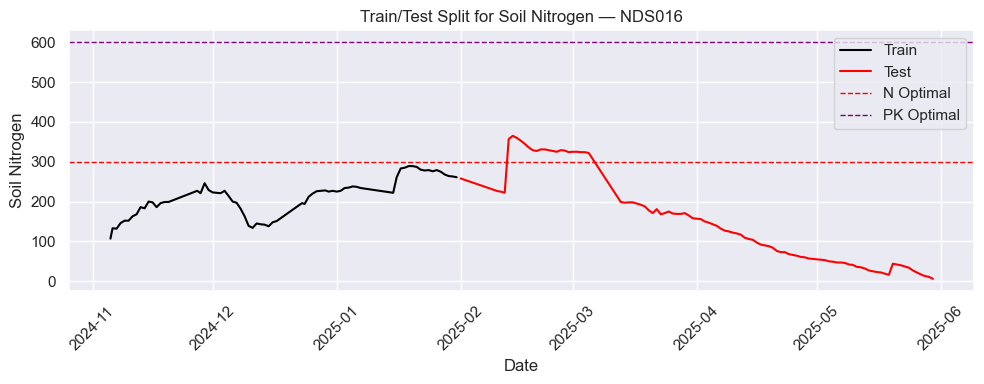

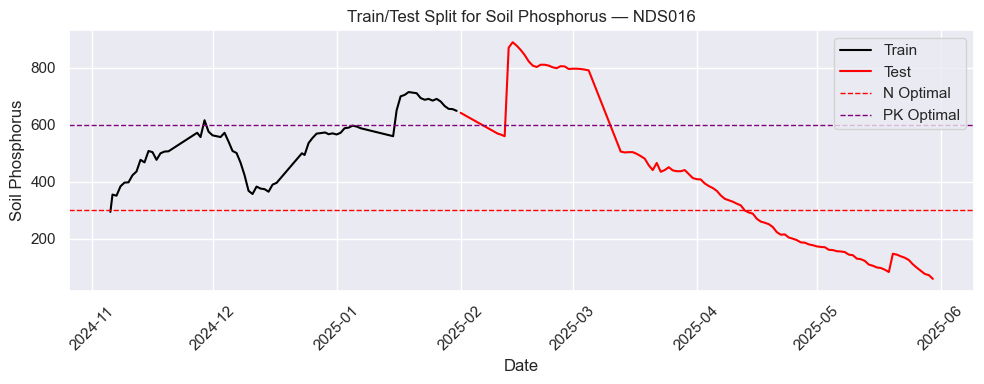

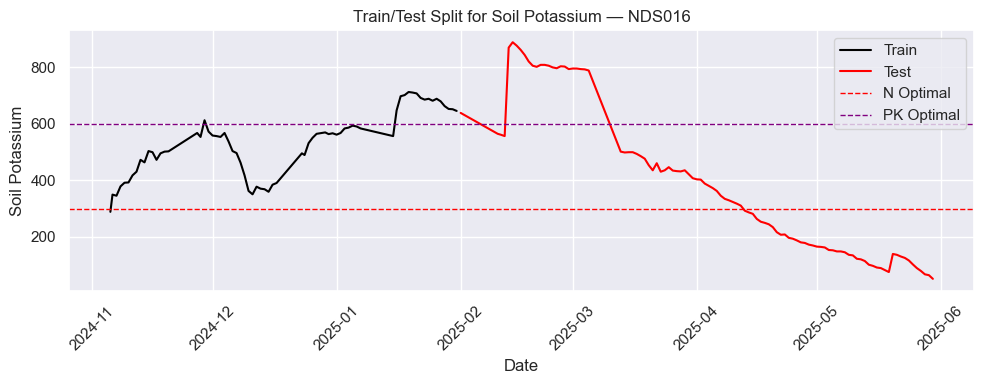

In [20]:
for name, tank_df in tank_groups.items():
    train = tank_df[tank_df.index < '2025-02-01']
    test = tank_df[tank_df.index >= '2025-02-01']
    
    for nutrient in ['Soil Nitrogen', 'Soil Phosphorus', 'Soil Potassium']:
        plt.figure(figsize=(10, 4))
        plt.plot(train.index, train[nutrient], color="black", label="Train")
        plt.plot(test.index, test[nutrient], color="red", label="Test")

        # Add horizontal lines
        plt.axhline(y=300, color='red', linestyle='--', linewidth=1, label='N Optimal')
        plt.axhline(y=600, color='purple', linestyle='--', linewidth=1, label='PK Optimal')
        
        plt.ylabel(nutrient)
        plt.xlabel('Date')
        plt.xticks(rotation=45)
        plt.title(f"Train/Test Split for {nutrient} — {name}")
        plt.legend()
        plt.tight_layout()
        plt.show()

ARMA Model

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Nitrogen - NDS004: 52.2903
RMSE as % of mean actual: 17.26%


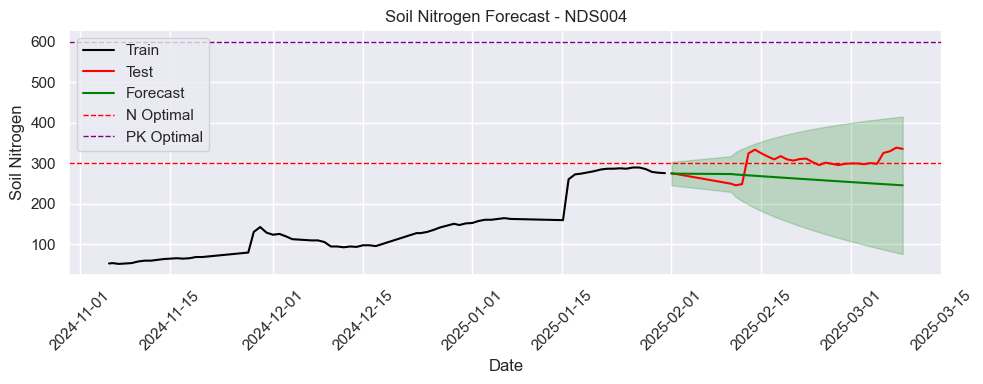

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Phosphorus - NDS004: 117.5719
RMSE as % of mean actual: 15.75%


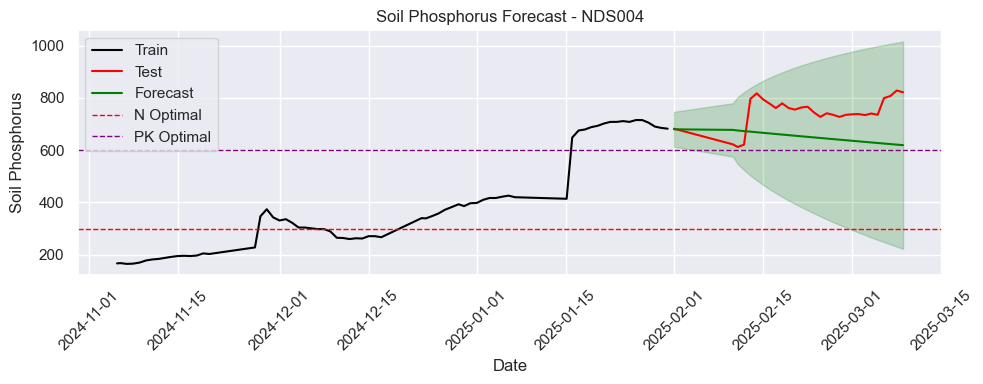

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Potassium - NDS004: 118.2896
RMSE as % of mean actual: 15.89%


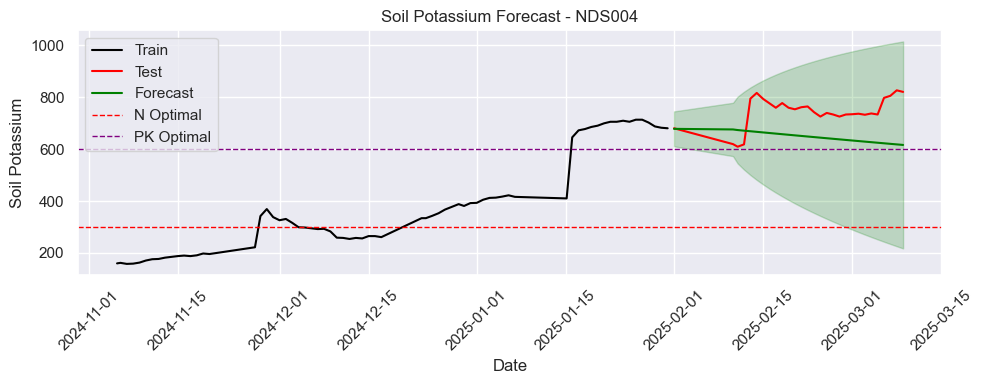

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Nitrogen - NDS005: 195.2454
RMSE as % of mean actual: 63.91%


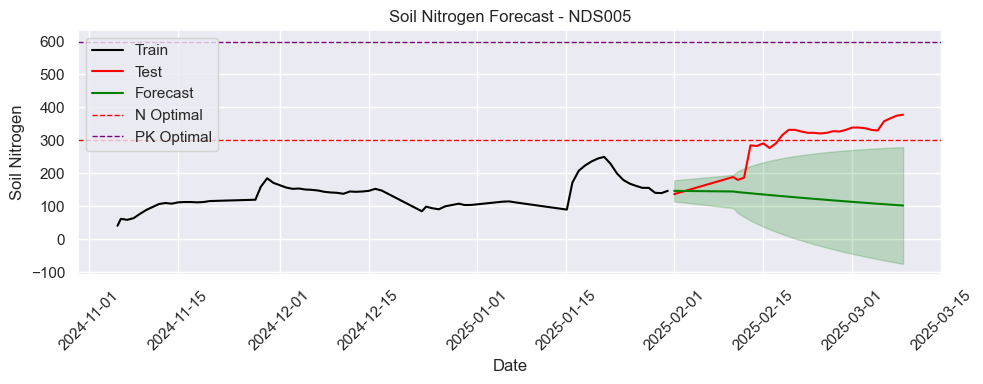

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Phosphorus - NDS005: 447.1632
RMSE as % of mean actual: 59.38%


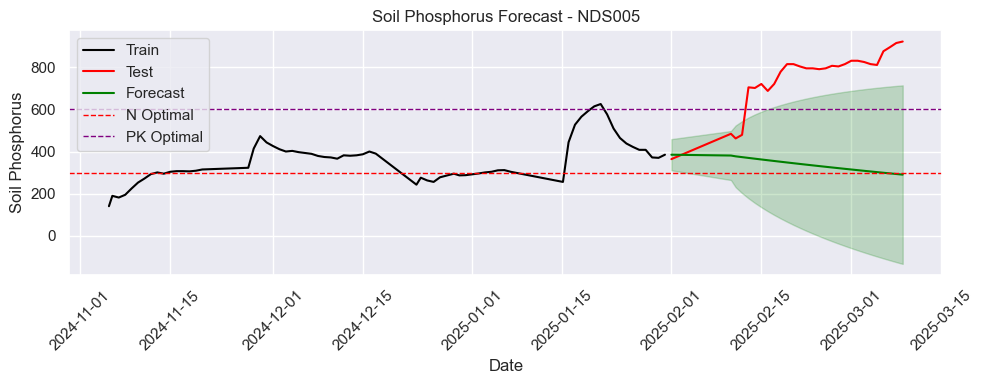

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Potassium - NDS005: 450.7141
RMSE as % of mean actual: 60.01%


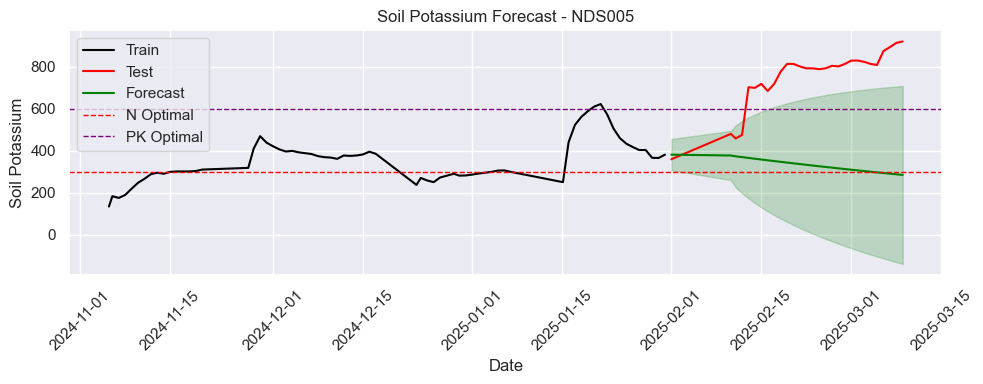

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Nitrogen - NDS006: 49.0738
RMSE as % of mean actual: 32.52%


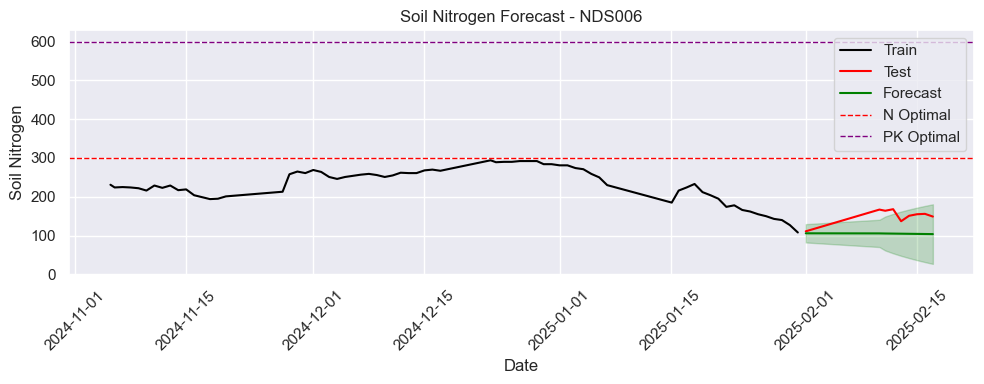

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Phosphorus - NDS006: 111.9996
RMSE as % of mean actual: 28.32%


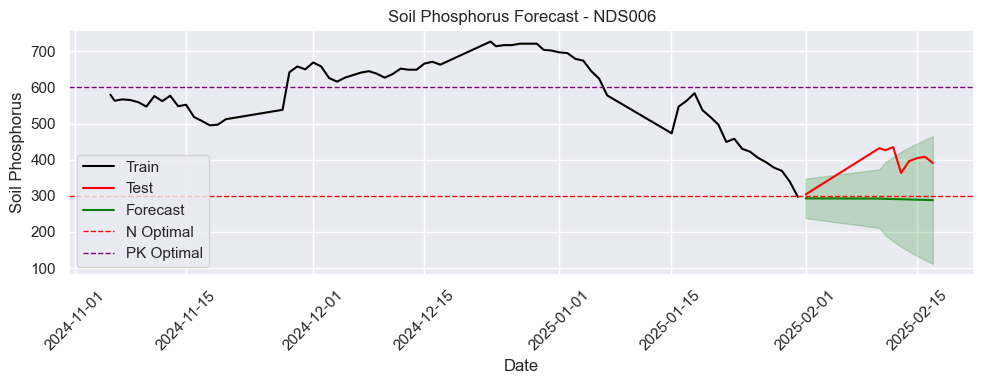

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Potassium - NDS006: 112.9496
RMSE as % of mean actual: 28.94%


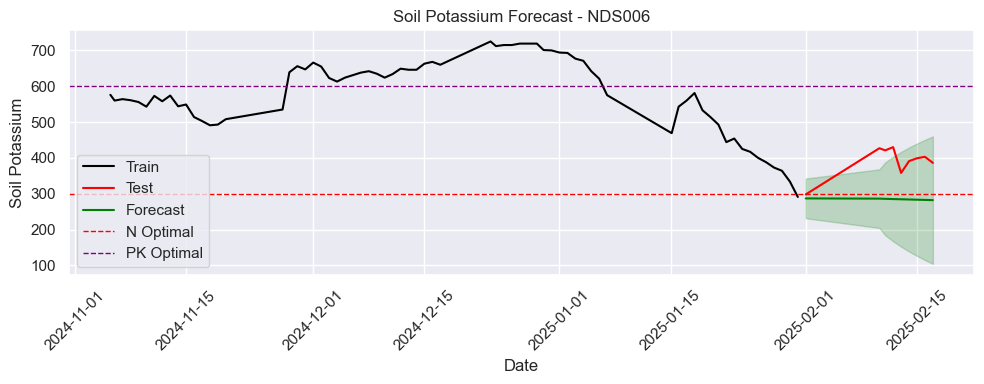

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Nitrogen - NDS011: 118.0818
RMSE as % of mean actual: 48.84%


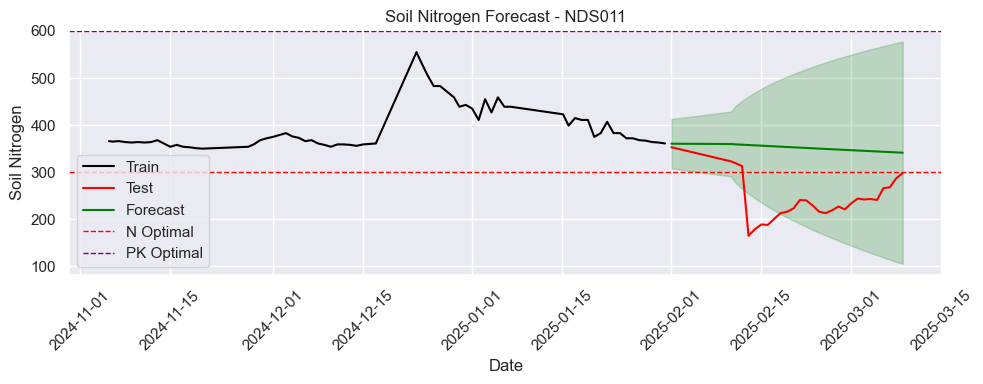

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Phosphorus - NDS011: 274.5262
RMSE as % of mean actual: 45.34%


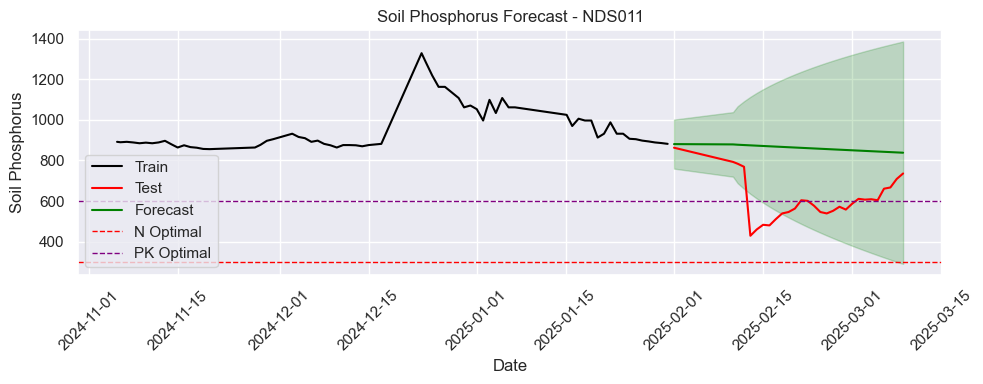

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Potassium - NDS011: 276.7146
RMSE as % of mean actual: 45.94%


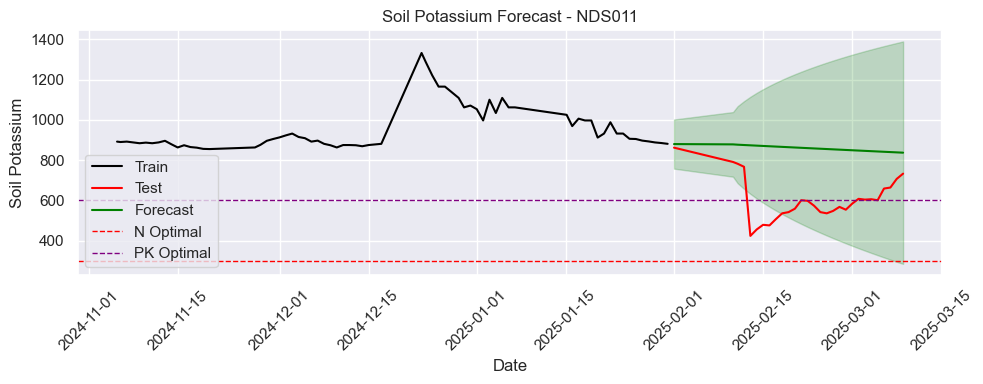

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Nitrogen - NDS012: 50.4509
RMSE as % of mean actual: 29.23%


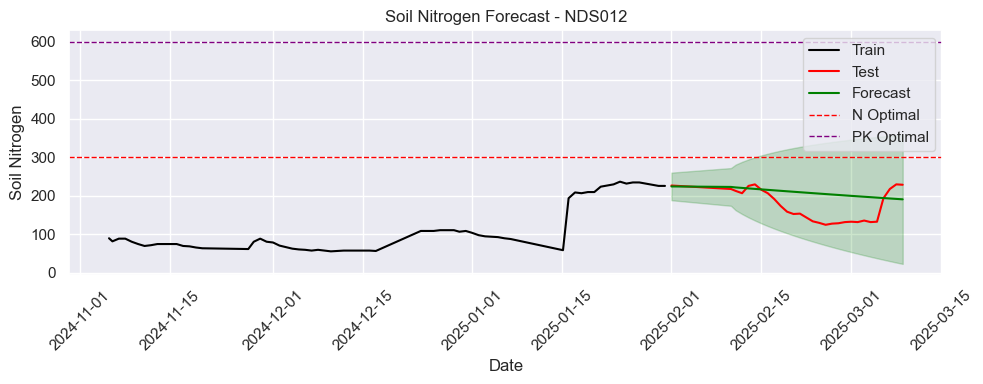

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Phosphorus - NDS012: 121.3805
RMSE as % of mean actual: 27.24%


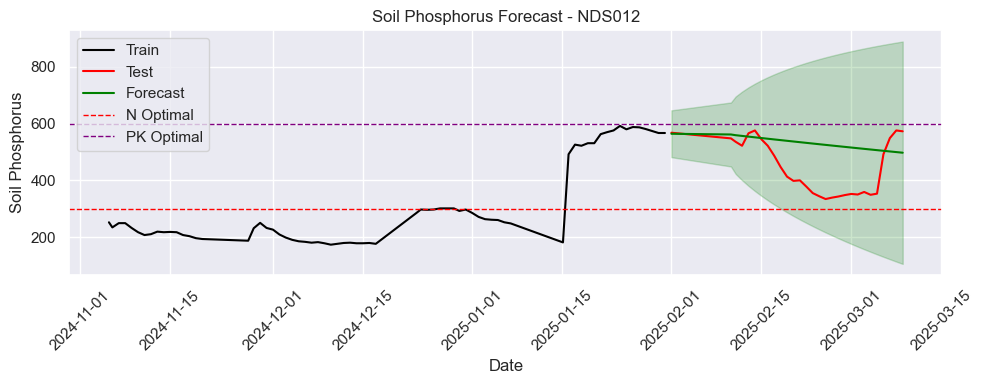

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Potassium - NDS012: 122.0311
RMSE as % of mean actual: 27.67%


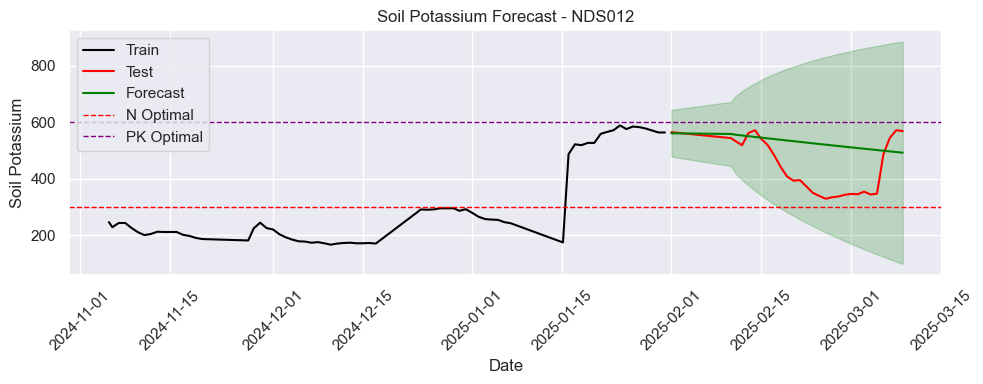

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Nitrogen - NDS015: 100.0285
RMSE as % of mean actual: 49.55%


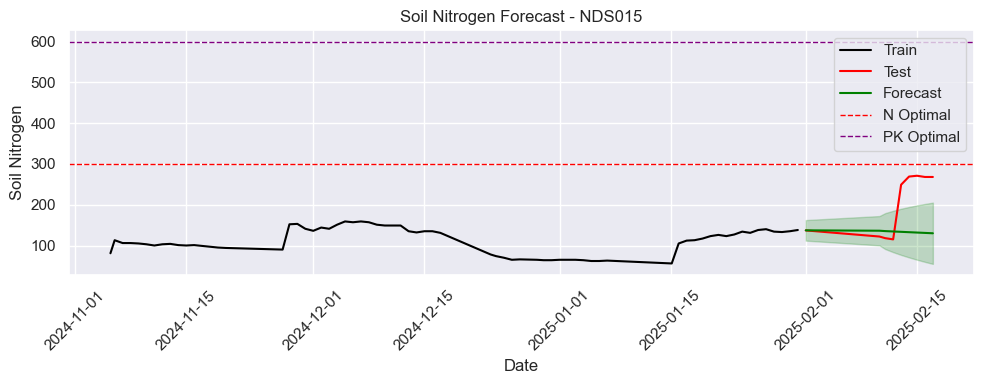

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Phosphorus - NDS015: 230.2428
RMSE as % of mean actual: 44.85%


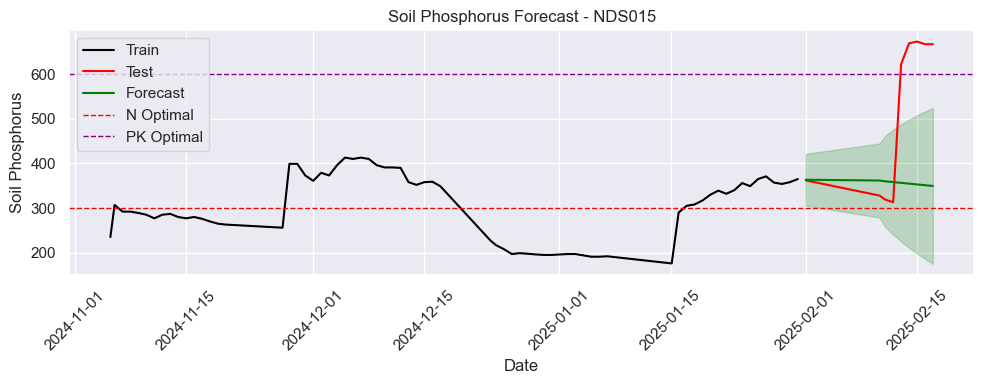

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

RMSE for Soil Potassium - NDS015: 232.0486
RMSE as % of mean actual: 45.57%


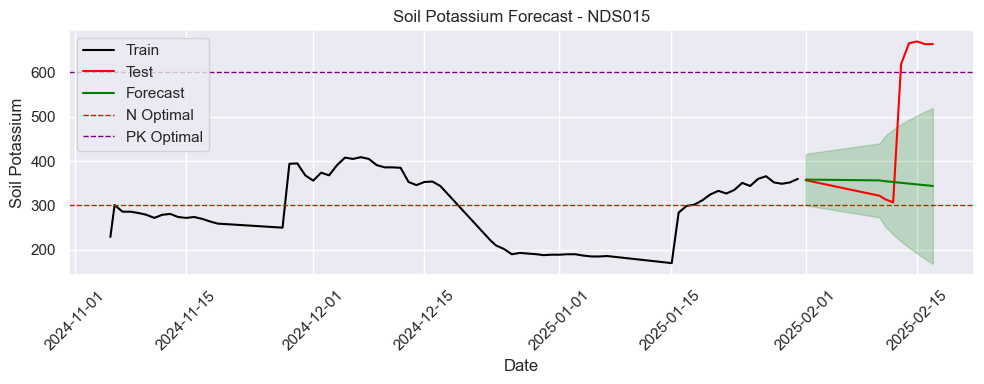

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Nitrogen - NDS016: 128.7864
RMSE as % of mean actual: 86.80%


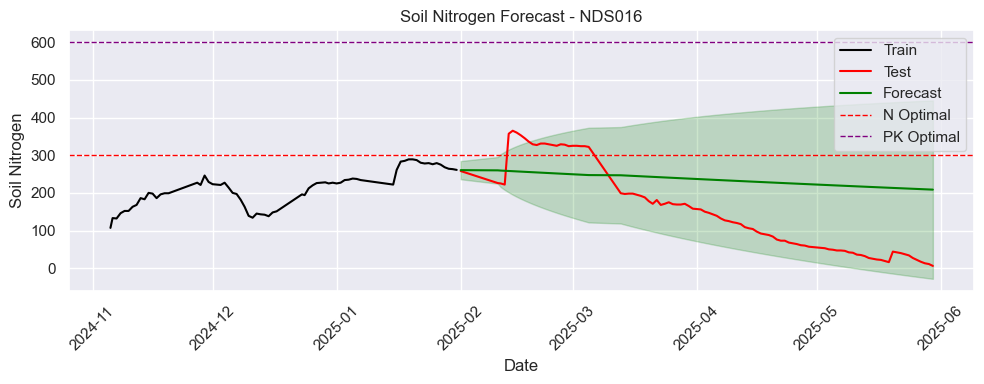

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Phosphorus - NDS016: 303.2800
RMSE as % of mean actual: 77.84%


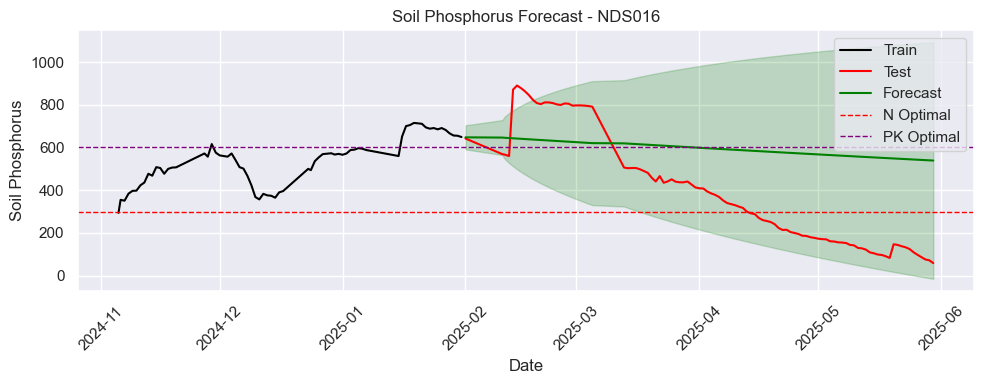

c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

RMSE for Soil Potassium - NDS016: 304.4874
RMSE as % of mean actual: 79.16%


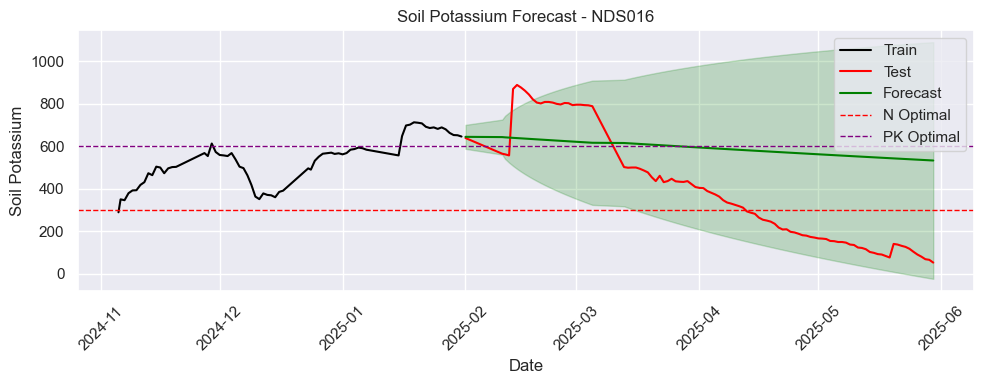

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np


split_date = pd.to_datetime("2025-02-01")

for name, df in tank_groups.items():
    df = df.sort_index()
    train = df[df.index < split_date]
    test = df[df.index >= split_date]

    for nutrient in ['Soil Nitrogen', 'Soil Phosphorus', 'Soil Potassium']:
        y_train = train[nutrient]
        y_test = test[nutrient]

        try:
            model = SARIMAX(y_train, order=(1, 0, 1))
            model_fit = model.fit(disp=False)

            forecast = model_fit.get_forecast(steps=len(y_test))
            pred_mean = forecast.predicted_mean
            conf_int = forecast.conf_int(alpha=0.05)

            # Calculate RMSE
            # Assuming you have y_test (actual values) and pred_mean (predicted values)
            rmse = np.sqrt(mean_squared_error(y_test, pred_mean))
            mean_actual = np.mean(y_test)
            rmse_percent = (rmse / mean_actual) * 100
            
            print(f'RMSE for {nutrient} - {name}: {rmse:.4f}')
            print(f'RMSE as % of mean actual: {rmse_percent:.2f}%')


            # Plotting code here
            plt.figure(figsize=(10, 4))
            plt.plot(y_train.index, y_train, label="Train", color="black")
            plt.plot(y_test.index, y_test, label="Test", color="red")
            plt.plot(y_test.index, pred_mean, label="Forecast", color="green")
            plt.fill_between(y_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2)

            # Add horizontal lines
            plt.axhline(y=300, color='red', linestyle='--', linewidth=1, label='N Optimal')
            plt.axhline(y=600, color='purple', linestyle='--', linewidth=1, label='PK Optimal')

            plt.title(f'{nutrient} Forecast - {name}')
            plt.xlabel('Date')
            plt.ylabel(nutrient)
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Failed to model {nutrient} for tank {name}: {e}")

